<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Quick-intro-to-cartopy" data-toc-modified-id="Quick-intro-to-cartopy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Quick intro to <code>cartopy</code></a></span></li><li><span><a href="#Projections" data-toc-modified-id="Projections-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Projections</a></span></li><li><span><a href="#Understanding-transforming" data-toc-modified-id="Understanding-transforming-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Understanding transforming</a></span></li><li><span><a href="#Plotting-netCDF-data" data-toc-modified-id="Plotting-netCDF-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plotting netCDF data</a></span><ul class="toc-item"><li><span><a href="#Load-netCDF-data-for-maps" data-toc-modified-id="Load-netCDF-data-for-maps-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load netCDF data for maps</a></span></li><li><span><a href="#Global-map" data-toc-modified-id="Global-map-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Global map</a></span></li><li><span><a href="#plotting-a-marker-on-the-map" data-toc-modified-id="plotting-a-marker-on-the-map-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>plotting a marker on the map</a></span></li><li><span><a href="#South-Polar-Stereographic" data-toc-modified-id="South-Polar-Stereographic-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>South Polar Stereographic</a></span></li></ul></li><li><span><a href="#With-Luke's-xda.map()-function" data-toc-modified-id="With-Luke's-xda.map()-function-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>With Luke's <code>xda.map()</code> function</a></span><ul class="toc-item"><li><span><a href="#Transverse-Mercator-for-sections" data-toc-modified-id="Transverse-Mercator-for-sections-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Transverse Mercator for sections</a></span></li></ul></li></ul></div>

In [1]:
%pylab inline

from cartopy import crs as ccrs, feature as cfeature
import xarray as xr
import cmocean.cm as cmo
import warnings
import sys

sys.path.insert(0, '..')
import scripts

plt.rcParams['figure.dpi'] = 120

warnings.filterwarnings('ignore', message='Mean of empty slice return')
warnings.filterwarnings('ignore', message='invalid value encountered in')

Populating the interactive namespace from numpy and matplotlib


# Quick intro to `cartopy`

If we want to plot this data as a map, we can use the `cartopy` package. This replaces the older `basemap` which will be discontinued

Below is an example of a simple map on a Plate Carree projection. 

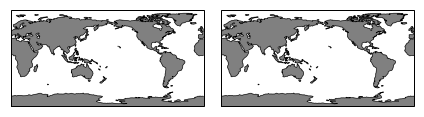

In [19]:
# import the modules from cartopy that we need
# c-prefix lets us know that it's from cartopy
from cartopy import crs as ccrs, feature as cfeature

# 
proj = ccrs.PlateCarree(central_longitude=180)

# fig = plt.figure(figsize=[6, 6])
# ax = fig.add_subplot(111, projection=proj)

fig, ax = plt.subplots(1, 2, subplot_kw={'projection': proj})

# play around with commenting with these properties

xgrid = [-180, -120, -60, 0, 60, 120, 180]
ygrid = [-90, -60, -30, 0, 30, 60, 90]

# unfortunately this only works for Mercator and PlateCarree for now
# ax.gridlines(draw_labels=True, linestyle='--', color='k', linewidth=0.5, alpha=0.5)  

ax[0].coastlines(lw=0.5, resolution='110m')
ax[0].add_feature(cfeature.LAND, color='gray')
ax[1].coastlines(lw=0.5, resolution='110m')
ax[1].add_feature(cfeature.LAND, color='gray')

# ax.stock_img()

fig.tight_layout()
plt.show()

# Projections

By changing the `crs.projection` of the axes we can easily plot data on a different projection.  
Below is a list of all the projections.  
Give some of these a go! 

       AlbersEqualArea
       AzimuthalEquidistant
       EuroPP
       Geocentric
    >> Geodetic
       Geostationary
       Gnomonic
       InterruptedGoodeHomolosine
       LambertAzimuthalEqualArea
       LambertConformal
       LambertCylindrical
       Mercator
       Miller
       Mollweide
       NearsidePerspective
       NorthPolarStereo
       OSGB
       OSNI
       Orthographic
    >> PlateCarree
    == Robinson
       RotatedGeodetic
       RotatedPole
       Sinusoidal
       SouthPolarStereo
    == Stereographic
       TransverseMercator

The two projections marked with `>>` are also used to transform data (described below).  
The projections marked with `==` are those that I use frequently

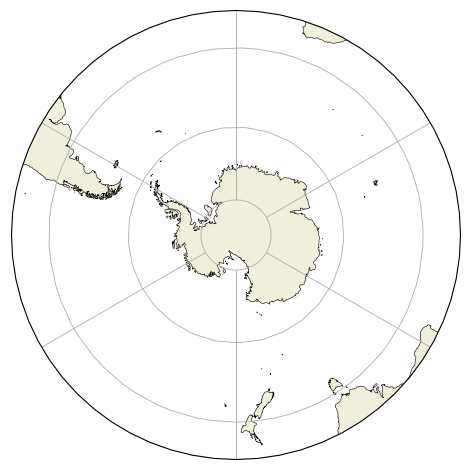

In [24]:
proj = ccrs.Stereographic(central_latitude=-90, scale_factor=7)

fig = plt.figure(figsize=[6, 6], dpi=80)
ax = fig.add_subplot(111, projection=proj)

ax.add_feature(cfeature.LAND)
ax.coastlines(lw=0.5, resolution='50m')
ax.gridlines(ylocs=[-20, -40, -60, -80])

fig.tight_layout()
plt.show()

# Understanding transforming

To change projection and plot data on the correct `lat x lon` grid the data needs to be transformed. 
This needs to be done as the map has a differnt coordinate system to latitude and longitde. 

If we want to plot a point on the map we thus need to convert latitude and longitude to this new coordinate system. This used to be tricky in `basemap`, but with `cartopy` we simply pass the `transform=` keyword arguement with a projection to transform the data. 

There are two projections that also act as transformations:
- `crs.PlateCarree()`: Transforms on a flat earth. See the example below
- `crs.Geodetic()`: Transforms on a spherical earth - plots the great-circle distance

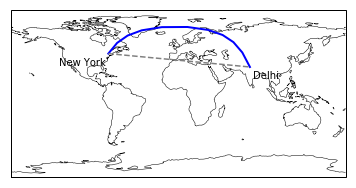

In [27]:
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.stock_img()
ax.coastlines(lw=0.5)

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat], transform=ccrs.Geodetic(), c='blue', lw=2, ms=2)
plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat], transform=ccrs.PlateCarree(), c='gray', ls='--')

plt.text(ny_lon - 3, ny_lat - 12,    'New York', ha='right', transform=ccrs.Geodetic())
plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi', ha='left',  transform=ccrs.PlateCarree())

ax.set_extent([-180, 180, -90, 90])

plt.show()

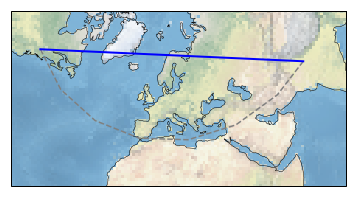

In [28]:
proj = ccrs.Stereographic(central_latitude=70, scale_factor=1)
ax = plt.axes(projection=proj)

ax.stock_img()
ax.add_feature(cfeature.LAND)
ax.coastlines(lw=0.5)

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat], transform=ccrs.PlateCarree(), c='gray', ls='--')
plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat], transform=ccrs.Geodetic(), c='blue', lw=2, ms=2)

ax.set_extent([-48, 70, 10, 90])
plt.show()

# Plotting netCDF data

## Load netCDF data for maps

In [30]:
chl = xr.open_dataarray('../../data/Globcolour/Globcolour_L3m_GLOB_16D_25km_CHL1_2014.nc')
chl = chl.mean('time').load()

/Users/luke/Dev/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


## Global map

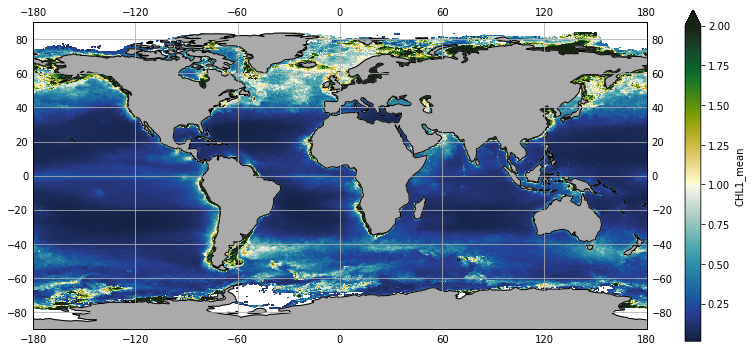

In [39]:
fig = figure(figsize=[11, 5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

qm = chl.plot(ax=ax, transform=ccrs.PlateCarree(), vmax=2, zorder=-1, cmap=cmo.delta)

ax.add_feature(cfeature.LAND, color='#AAAAAA', zorder=0)
ax.coastlines(zorder=0)
ax.gridlines(draw_labels=True)

fig.tight_layout()
fig.savefig('../../images/Chl_global.png', dpi=100, bbox_inches='tight')
plt.show()

## plotting a marker on the map

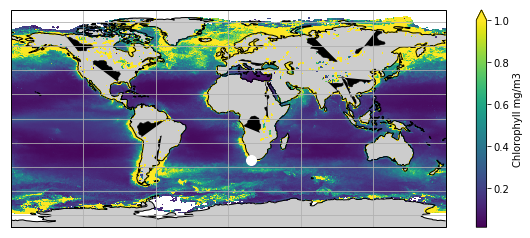

In [68]:
# try this on your own first. Luke will show the result here afterwards!

proj = ccrs.PlateCarree()
tran = ccrs.PlateCarree()

fig, ax = plt.subplots(1, 1, figsize=[11, 4], subplot_kw={'projection': proj})

chl.plot.pcolormesh(ax=ax, 
                    transform=ccrs.PlateCarree(), 
                    vmax=1, 
                    cbar_kwargs={'label': 'Chlorophyll mg/m3'},
                   )
ax.coastlines()
ax.add_feature(cfeature.LAND, color='#CCCCCC')
ax.add_feature(cfeature.RIVERS, color='k', lw=0.4)

ax.plot(19, -34, 'ow', ms=10, transform=tran)

ax.gridlines()


## South Polar Stereographic

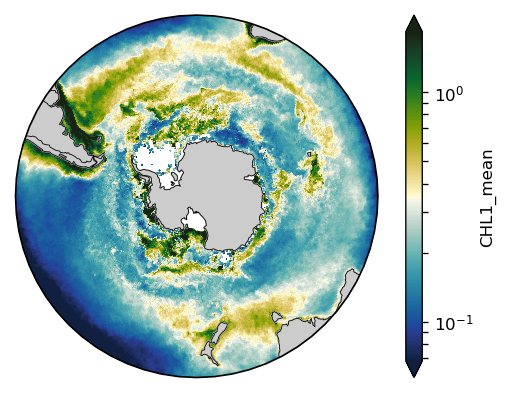

In [63]:
fig = plt.figure(dpi=120)
proj = ccrs.Stereographic(central_latitude=-90, scale_factor=7)
ax = fig.add_subplot(111, projection=proj)

so = chl.sel(lat=slice(-90, -30))
img = so.plot(ax=ax, transform=ccrs.PlateCarree(), 
              norm=mpl.colors.LogNorm(), robust=True, cmap=cmo.delta, 
              zorder=-1)

ax.add_feature(cfeature.LAND, color='#CCCCCC', zorder=0)
ax.add_feature(cfeature.COASTLINE, lw=0.5, zorder=0)
ax.add_feature(cfeature.BORDERS, lw=0.5, zorder=0)

plt.show()

In [71]:
sys.path.insert(0, '../../scripts/')
import xarray_tools as xt

    xarray tools: xr.DataArray.map()


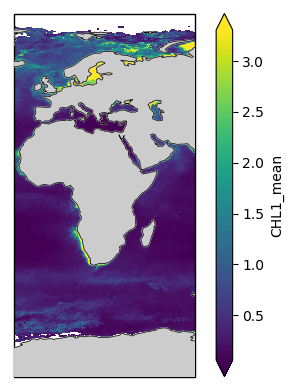

In [73]:
chl.sel(lon=slice(-20, 70)).map()

# With Luke's `xda.map()` function

I made a function that makes it very quick to look at data and it produces a plot that is near publication ready.

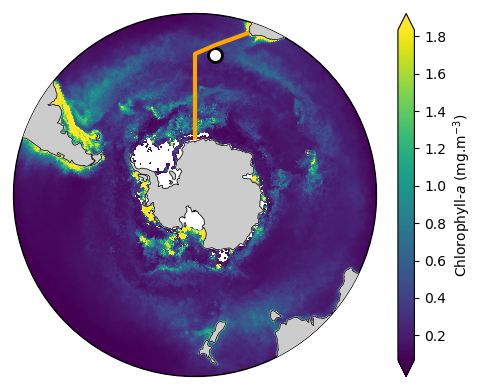

In [74]:
ax = so.map(proj=ccrs.Stereographic(central_latitude=-90, scale_factor=7))

ax.plot(8, -43, 'ow', mec='k', mew=2, ms=10, transform=ccrs.PlateCarree())
ax.plot([19, 0, 0], [-34, -43, -70], '-', lw=3, c='orange', transform=ccrs.Geodetic())

ax.colorbar.set_label('Chlorophyll-$a$ (mg.m$^{-3}$)')

## Transverse Mercator for sections

/Users/luke/Dev/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)


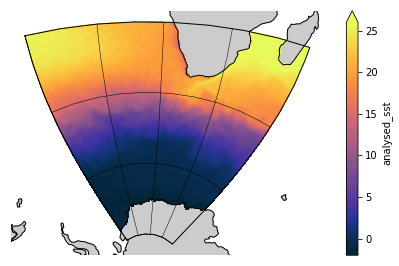

In [75]:
sst_fname = '../../data/GHRSST/201*.nc'

xds = xr.open_mfdataset(sst_fname, autoclose=True).sel(lat=slice(-80, -20))
sst = xds.analysed_sst - 273.15
ice = xds.sea_ice_fraction

sst_avg = sst.mean('time').load()
ice_avg = ice.mean('time').load()

fig = plt.figure(figsize=[8, 4.5])
ax = fig.add_subplot(111, projection=ccrs.TransverseMercator(central_longitude=5, scale_factor=1), frameon=False)
im = sst_avg.plot(ax=ax, transform=ccrs.PlateCarree(), 
                  cmap=cmo.thermal, vmin=-2, vmax=26, )

def draw_boundary_gridlines(xda, ax):
    ax.outline_patch.set_linewidth(0)

    ur = np.around([xda.lon.max().values, xda.lat.max().values]).tolist()
    ll = np.around([xda.lon.min().values, xda.lat.min().values]).tolist()

    bx = ll[0], ll[0], ur[0], ur[0], ll[0]
    by = ur[1], ll[1], ll[1], ur[1], ur[1]
    tf = ccrs.PlateCarree()
    
    ax.plot(bx, by, c='k', lw=1, transform=tf)
    
    gx = np.arange(ll[0], ur[0], 20)
    gy = np.arange(ll[1], ur[1], 20)

    prop = dict(transform=tf, color='k', lw=0.5)
    [ax.plot([x, x], [ll[1], ur[1]], **prop) for x in gx]
    [ax.plot([ll[0], ur[0]], [y, y], **prop) for y in gy]

    return ur, ll

draw_boundary_gridlines(sst_avg, ax)

ax.coastlines()
ax.add_feature(cfeature.LAND, color='#CCCCCC')
plt.show()